<a href="https://colab.research.google.com/github/capofwesh20/Time-Series-forecasting-with-LSTM-and-FB-Prophet/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting with FB Prophet and LSTM**

A time-series is a combination of observations that have been collected over time. These observations depend on the passage of time, which cannot be disregarded, thus we must analyze the data while keeping the passage of time in mind.

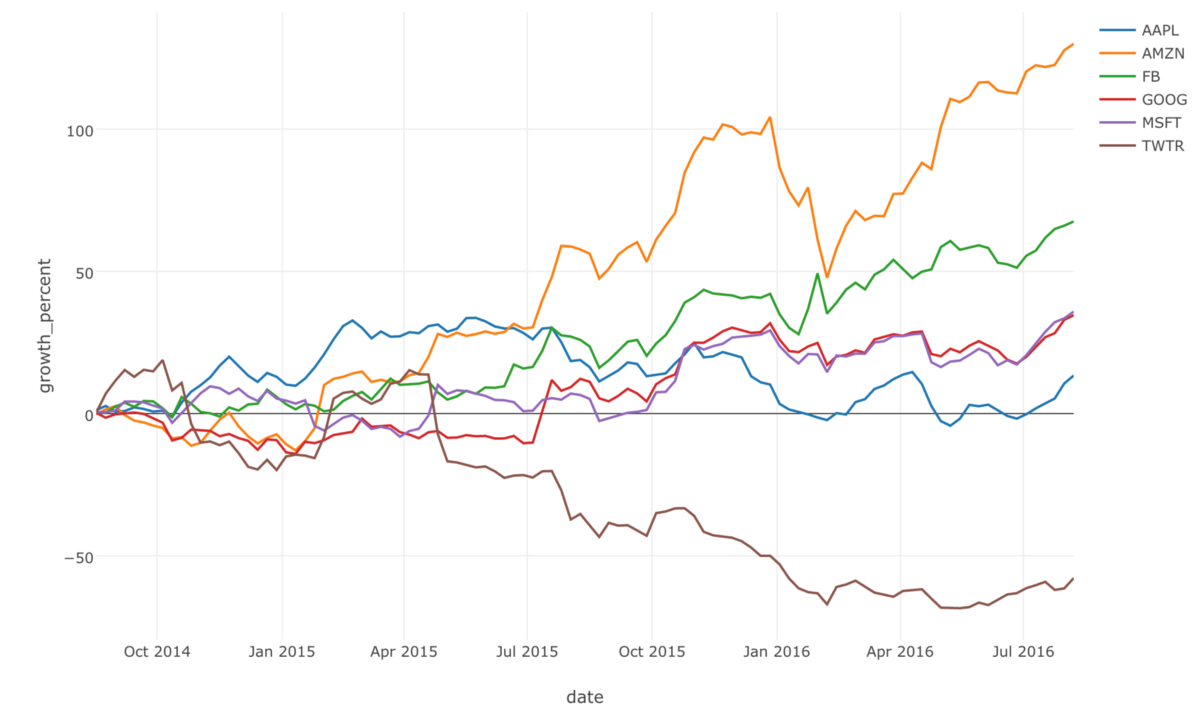

# **Time Series Forecasting**

One of the most often utilized machine learning approaches in practical applications is time series forecasting. Time-series forecasting is the statistical examination of trends and patterns from particular time-series data in order to forecast future values from historical data. Despite being referred to as a supervised or self-supervised learning strategy, it belongs to the unsupervised learning group. Finding patterns in time-series data can be quite difficult due to the irregular nature of the data.

# **Use-cases and applications:**
1. Forecast product demand
2. Economic growth and population forecasting
3. Weather forecasting
4. Stock price forecasting
5. Sales/Revenue forecasting
6. Web-traffic forecasting



# **Problem-statement**
In this notebook, our problem-statement is to analyse top 10 actively traded stocks on Yahoo_Finance (We will analyze 10 popular stocks and forecast the future prices) and build forecasting models that beat the market.

Table of contents:
1. Importing libraries

2. Data analysis and visualizations

* Data cleaning
* What are the TOP 10 most traded stocks?
* Closing stock price visualization and what was the maximum price?
* What was the trade volume during period of 2017-22?
* Comparative analysis of tech stocks
* Growth of stock price over a period of 2017-22

3. Stock price forecasting: Modeling & forecasts

* Forecasting using Prophet
* Forecasting using LSTM

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import tensorflow as tf
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime

init_notebook_mode(connected=True)
%matplotlib inline
# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_1 = pdr.get_data_yahoo('TSLA')
df_2 = pdr.get_data_yahoo('AAPL')
df_3 = pdr.get_data_yahoo('AMZN')
df_4 = pdr.get_data_yahoo('NVDA')
df_5 = pdr.get_data_yahoo('ET')
df_6 = pdr.get_data_yahoo('ITUB')
df_7 = pdr.get_data_yahoo('AMD')
df_8 = pdr.get_data_yahoo('CCL')
df_9 = pdr.get_data_yahoo('F')
df_10= pdr.get_data_yahoo('VALE')

In [11]:
all_stocks = ['TSLA','AAPL','VALE','F','ET','AMZN','AMD','ITUB','NVDA','CCL']

for i in all_stocks:
  if i == 'TSLA':
    Name = [i] * 1258
    df_1['Name']= Name
  elif i == 'AAPL':
    Name = [i] * 1258
    df_2['Name']= Name
  elif i == 'VALE':
    Name = [i] * 1258
    df_3['Name']= Name
  elif i == 'F':
    Name = [i] * 1258
    df_4['Name']= Name
  elif i == 'ET':
    Name = [i] * 1258
    df_5['Name']= Name
  elif i == 'AMZN':
    Name = [i] * 1258
    df_6['Name']= Name
  elif i == 'AMD':
    Name = [i] * 1258
    df_7['Name']= Name
  elif i == 'ITUB':
    Name = [i] * 1258
    df_8['Name']= Name
  elif i == 'NVDA':
    Name = [i] * 1258
    df_9['Name']= Name
  else:
    Name = [i] * 1258
    df_10['Name']= Name

In [12]:
df_2.head()

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.415638,AAPL
2017-10-05,38.860001,38.512501,38.544998,38.847500,85135200.0,36.868816,AAPL
2017-10-06,38.872501,38.639999,38.742500,38.825001,69630400.0,36.847469,AAPL
2017-10-09,39.182499,38.872501,38.952499,38.959999,65051600.0,36.975582,AAPL
2017-10-10,39.500000,38.775002,39.014999,38.974998,62468000.0,36.989822,AAPL


In [13]:
df_10_stocks = pd.concat([df_8,df_7,df_6,df_4,df_5,df_3,df_9,df_2,df_1,df_10], axis = 0)

In [14]:
df_10_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12580 entries, 2017-10-04 to 2022-10-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       12580 non-null  float64
 1   Low        12580 non-null  float64
 2   Open       12580 non-null  float64
 3   Close      12580 non-null  float64
 4   Volume     12580 non-null  float64
 5   Adj Close  12580 non-null  float64
 6   Name       12580 non-null  object 
dtypes: float64(6), object(1)
memory usage: 786.2+ KB


In [15]:
df_10_stocks=df_10_stocks.reset_index()
df_10_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12580 non-null  datetime64[ns]
 1   High       12580 non-null  float64       
 2   Low        12580 non-null  float64       
 3   Open       12580 non-null  float64       
 4   Close      12580 non-null  float64       
 5   Volume     12580 non-null  float64       
 6   Adj Close  12580 non-null  float64       
 7   Name       12580 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 786.4+ KB


In [16]:
df_10_stocks.head().style.set_properties(**{'background-color': 'green',
                           'color': 'white',
                           'border-color': 'white'})

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2017-10-04 00:00:00,65.419998,64.449997,64.500000,65.190002,4011000.000000,59.601482,ITUB
1,2017-10-05 00:00:00,66.169998,64.919998,64.959999,65.910004,4504400.000000,60.259762,ITUB
2,2017-10-06 00:00:00,66.160004,65.190002,65.919998,65.629997,3411200.000000,60.003757,ITUB
3,2017-10-09 00:00:00,66.480003,65.379997,65.610001,66.449997,3157100.000000,60.753464,ITUB
4,2017-10-10 00:00:00,67.379997,66.559998,66.639999,67.080002,3571500.000000,61.329460,ITUB


In [17]:
# saving the DataFrame as a CSV file
stock_csv_data = df_10_stocks.to_csv('stocks.csv', index = True)

# **Top 10 stock  by average trade volume**

In [18]:
# find the average volume of each stocks using function and sort top 10 most traded stocks for further analysis 
mean_dict = {}

# find average of volume traded over a period of time using for loops
for key in df_10_stocks['Name'].unique():
    value = df_10_stocks[df_10_stocks['Name'] == key ]['Volume'].mean()
    mean_dict[key]= value

print("Length of the Names in dictionary:", len(mean_dict))

# convert dict to pandas dataframe
average = pd.Series(mean_dict).transpose()
frame = average.sort_values(ascending=False)[:10]

print("Top 10 company names with highest average traded stock volume:\n", frame.index)

Length of the Names in dictionary: 10
Top 10 company names with highest average traded stock volume:
 Index(['TSLA', 'AAPL', 'VALE', 'AMD', 'NVDA', 'F', 'AMZN', 'CCL', 'ITUB',
       'ET'],
      dtype='object')


In [19]:
# function to return top 10 sub dataframe
def subdataframe(df_10_stocks, tick):
    

# top 10 ticks
    ticks = list(frame.index)
    
    assert tick in ticks, """Stock tick does not belong to top 10 stocks by trade volume, please try any of these:\n
    ['TSLA', 'AAPL', 'VALE', 'AMD', 'NVDA', 'F', 'AMZN', 'CCL', 'ITUB',
       'ET']"""
    
    ndf = df_10_stocks[df_10_stocks['Name'] == tick]
    return ndf


# company dict for respective ticks (TOP 10 STOCKS BY AVERAGE TRADE VOLUME)
company_dict = {'TSLA':'Tesla', 
                'AAPL':'Apple', 
                'VALE':'VALE SA', 
                'F':'Ford Motor Company', 
                'ET':'Energy Transfer LP', 
                'AMZN':'Amazon', 
                'AMD':'Adavanced Micro Devices', 
                'ITUB':'Itau Unibaco Holdings SA', 
                'NVDA':'Nvidia Corp', 
                'CCL':'Carnival Corporation & plc'
               }

TSLA_df = subdataframe(df_10_stocks, 'TSLA')
AAPL_df = subdataframe(df_10_stocks, 'AAPL')
VALE_df = subdataframe(df_10_stocks, 'VALE')
F_df = subdataframe(df_10_stocks, 'F')
ET_df = subdataframe(df_10_stocks, 'ET')
AMZN_df = subdataframe(df_10_stocks, 'AMZN')
AMD_df = subdataframe(df_10_stocks, 'AMD')
ITUB_df = subdataframe(df_10_stocks, 'ITUB')
NVDA_df = subdataframe(df_10_stocks, 'NVDA')
CCL_df = subdataframe(df_10_stocks, 'CCL')


# define a function to return daily return and company column
def dailyfunc(df_10_stocks):
    df_10_stocks['daily return'] = ((df_10_stocks['Close'] - df_10_stocks['Open'])/df_10_stocks['Open'])*100
    df_10_stocks.style.format('{:.2f}%', subset='daily return')
    df_10_stocks['daily_mean'] = (df_10_stocks['Open'] + df_10_stocks['Close'] + df_10_stocks['High'] + df_10_stocks['Low'])/4
    df_10_stocks['company_name'] = company_dict[df_10_stocks['Name'].unique()[0]]
    return df_10_stocks

TSLA_df = dailyfunc(TSLA_df)
AAPL_df = dailyfunc(AAPL_df)
VALE_df = dailyfunc(VALE_df)
F_df = dailyfunc(F_df)
ET_df = dailyfunc(ET_df)
AMZN_df = dailyfunc(AMZN_df)
AMD_df = dailyfunc(AMD_df)
ITUB_df = dailyfunc(ITUB_df)
NVDA_df = dailyfunc(NVDA_df)
CCL_df = dailyfunc(CCL_df)

print('\t\tStart Date\t\t\t\t\tEnd Date')
print(f"TSLA\t\t{TSLA_df['Date'].min()}\t\t\t{TSLA_df['Date'].max()}")
print(f"AAPL\t\t{AAPL_df['Date'].min()}\t\t\t{AAPL_df['Date'].max()}")
print(f"VALE\t\t{VALE_df['Date'].min()}\t\t\t{VALE_df['Date'].max()}")
print(f"F\t\t{F_df['Date'].min()}\t\t\t{F_df['Date'].max()}")
print(f"ET\t\t{ET_df['Date'].min()}\t\t\t{ET_df['Date'].max()}")
print(f"AMZN\t\t{AMZN_df['Date'].min()}\t\t\t{AMZN_df['Date'].max()}")
print(f"AMD\t\t{AMD_df['Date'].min()}\t\t\t{AMD_df['Date'].max()}")
print(f"ITUB\t\t{ITUB_df['Date'].min()}\t\t\t{ITUB_df['Date'].max()}")
print(f"NVDA\t\t{NVDA_df['Date'].min()}\t\t\t{NVDA_df['Date'].max()}")
print(f"CCL\t\t{CCL_df['Date'].min()}\t\t\t{CCL_df['Date'].max()}")

		Start Date					End Date
TSLA		2017-10-04 00:00:00			2022-10-03 00:00:00
AAPL		2017-10-04 00:00:00			2022-10-03 00:00:00
VALE		2017-10-04 00:00:00			2022-10-03 00:00:00
F		2017-10-04 00:00:00			2022-10-03 00:00:00
ET		2017-10-04 00:00:00			2022-10-03 00:00:00
AMZN		2017-10-04 00:00:00			2022-10-03 00:00:00
AMD		2017-10-04 00:00:00			2022-10-03 00:00:00
ITUB		2017-10-04 00:00:00			2022-10-03 00:00:00
NVDA		2017-10-04 00:00:00			2022-10-03 00:00:00
CCL		2017-10-04 00:00:00			2022-10-03 00:00:00


In [20]:
TSLA_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name,daily return,daily_mean,company_name
10064,2017-10-04,23.908001,23.306667,23.416668,23.667334,122452500.0,23.667334,TSLA,1.070458,23.574667,Tesla
10065,2017-10-05,23.829332,23.423332,23.733334,23.688667,62575500.0,23.688667,TSLA,-0.188201,23.668666,Tesla
10066,2017-10-06,24.006666,23.483334,23.540001,23.792000,64462500.0,23.792000,TSLA,1.070514,23.705500,Tesla
10067,2017-10-09,23.450001,22.844667,23.309999,22.862667,112405500.0,22.862667,TSLA,-1.919058,23.116834,Tesla
10068,2017-10-10,23.708668,23.035334,23.120001,23.705999,104677500.0,23.705999,TSLA,2.534596,23.392500,Tesla


# Closing stock price visualizations & maximum price during 5 years

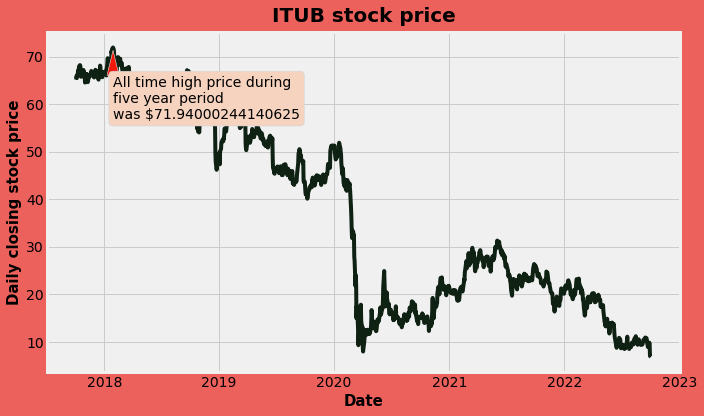

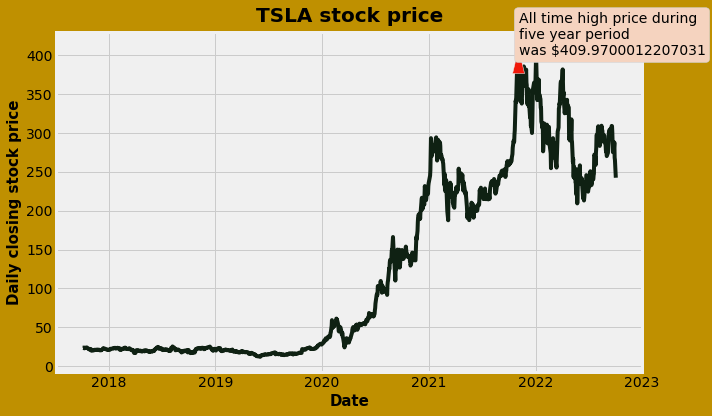

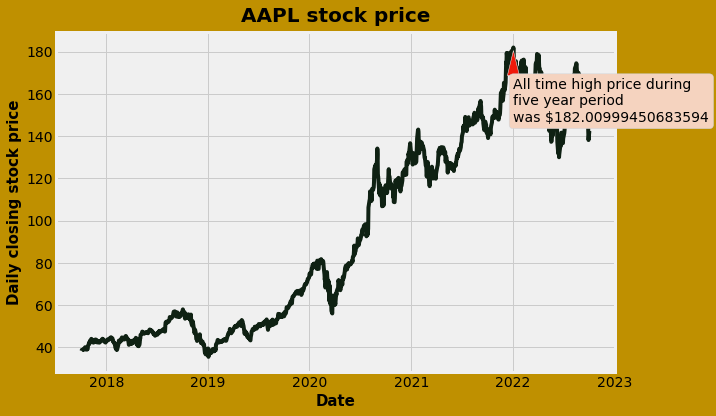

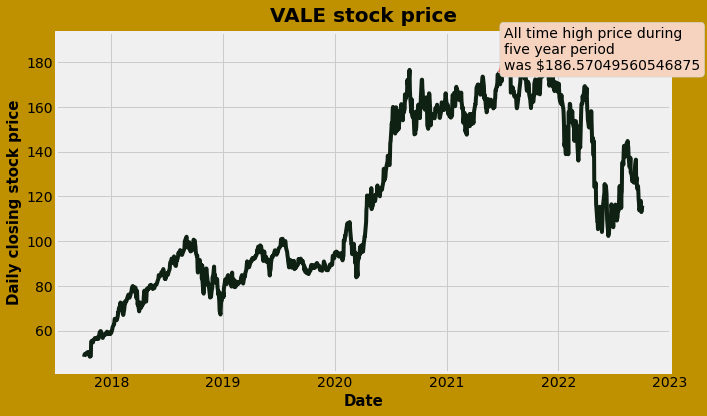

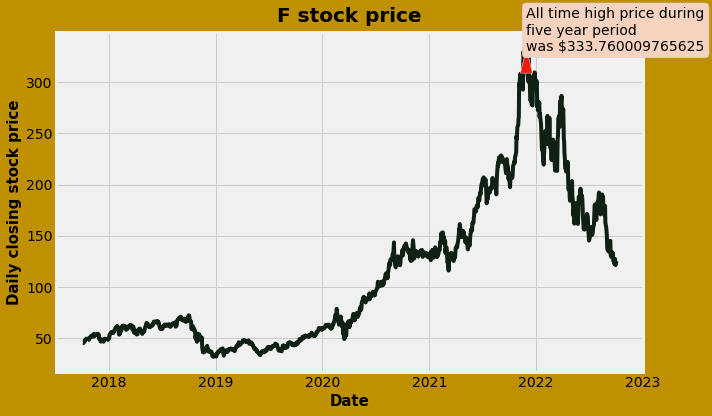

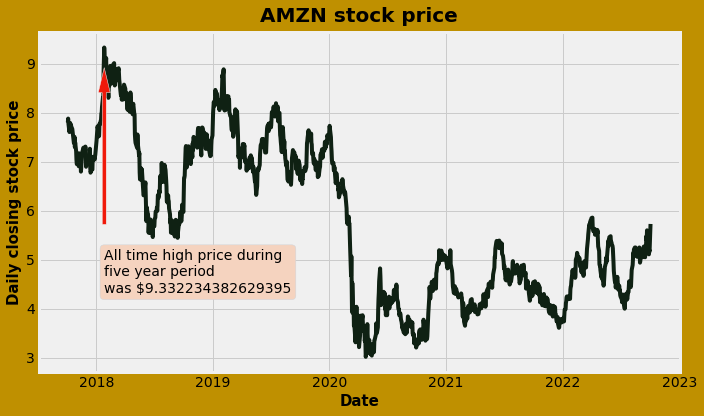

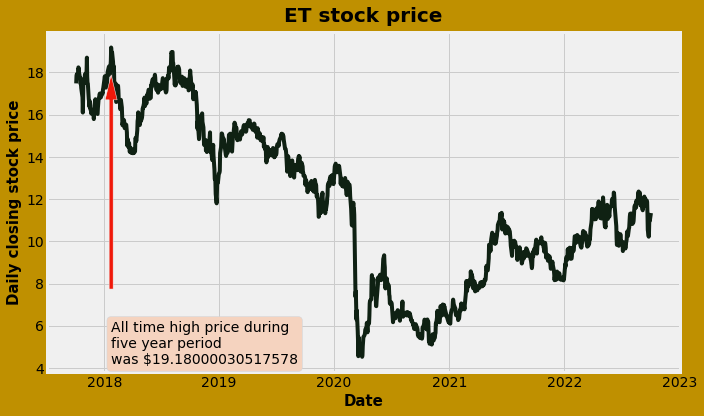

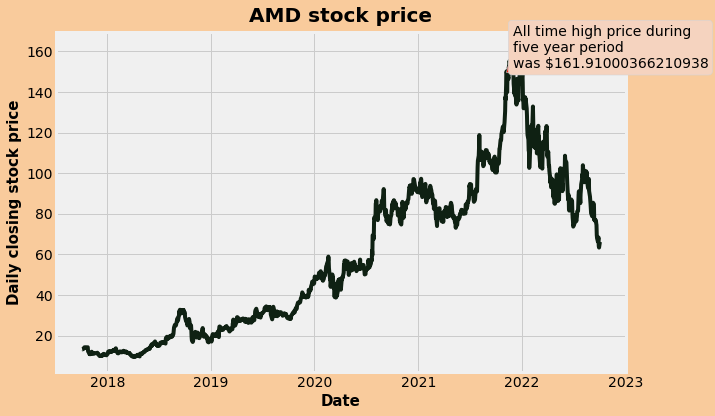

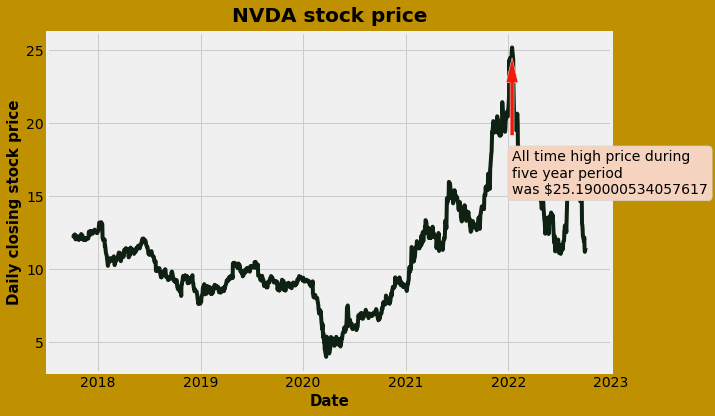

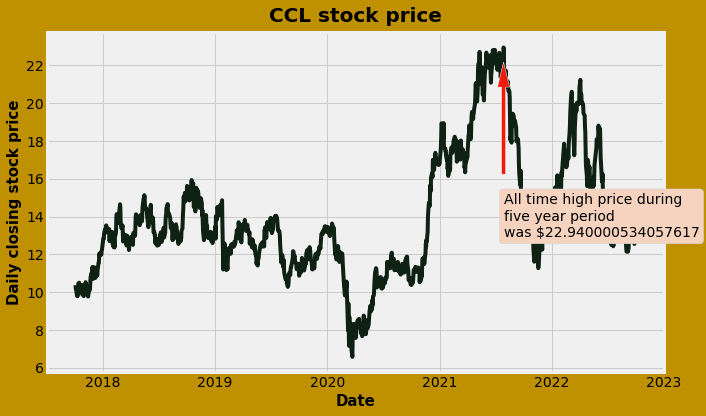

In [21]:
# function return closing stock price over a 5 years of time period
def closing_stock_price(df_10_stocks):
    
    # define highest stock over 5 period of time with date of the same
    high = df_10_stocks['Close'].max()
    datetime = df_10_stocks[df_10_stocks['Close'] == df_10_stocks['Close'].max()]['Date'].values
    
    if df_10_stocks['Name'].unique()[0] == 'ITUB':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    elif df_10_stocks['Name'].unique()[0] == 'AMD':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#f9cb9c')
    else:
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#bf9000')
    ax.plot(df_10_stocks['Date'], df_10_stocks['Close'], color='#0f2113')
    ax.set_title(f"{df_10_stocks['Name'].unique()[0]} stock price", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily closing stock price", fontsize=15)



    if df_10_stocks['Name'].unique()[0] == 'AAPL':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df_10_stocks['Name'].unique()[0] == 'F':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-3),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))

    elif df_10_stocks['Name'].unique()[0] == 'ET':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-15),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df_10_stocks['Name'].unique()[0] == 'AMZN':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-5),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df_10_stocks['Name'].unique()[0] == 'ITUB':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-15),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    else:
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-10),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))

    plt.show()
    
# plot of all the closing stocks

closing_stock_price(ITUB_df)
closing_stock_price(TSLA_df)
closing_stock_price(AAPL_df)
closing_stock_price(VALE_df)
closing_stock_price(F_df)
closing_stock_price(AMZN_df)
closing_stock_price(ET_df)
closing_stock_price(AMD_df)
closing_stock_price(NVDA_df)
closing_stock_price(CCL_df)

**Key findings**:

We could find TOP 10 most traded stocks duing period of 2017-2022.
One will notice that some stocks never recovered from COVID-19 pandemic, while some wasn't affected and other recovered fully.

# **Trade volume of stocks over a period of 2017-2022**

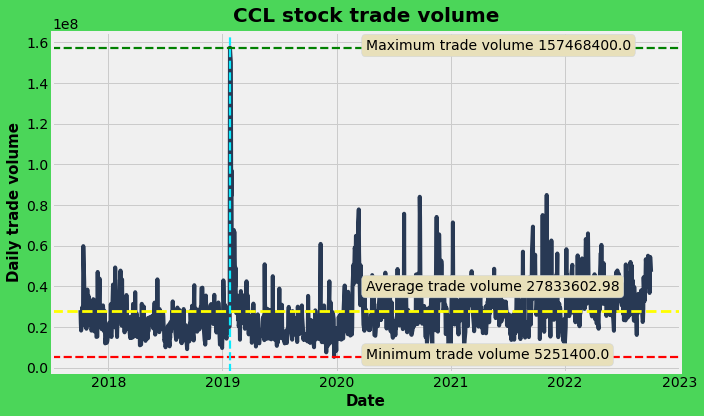

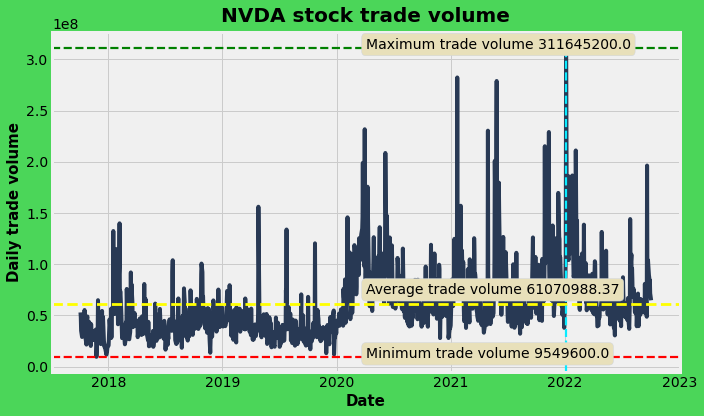

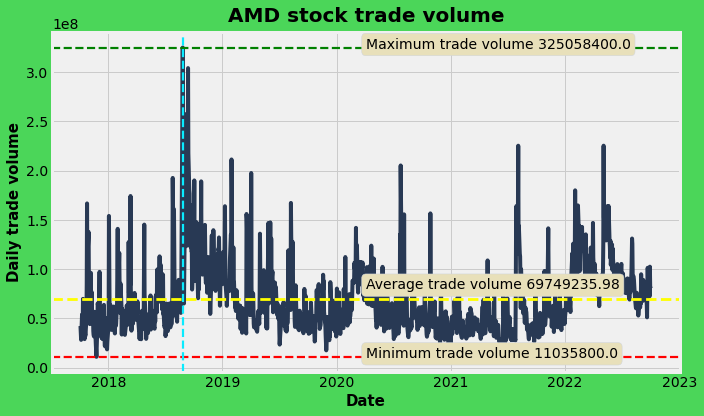

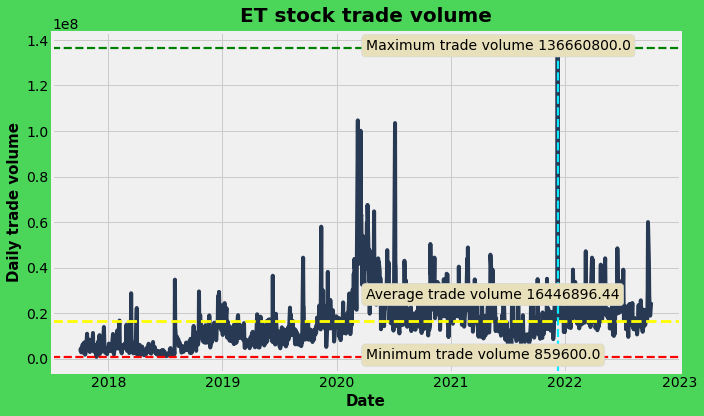

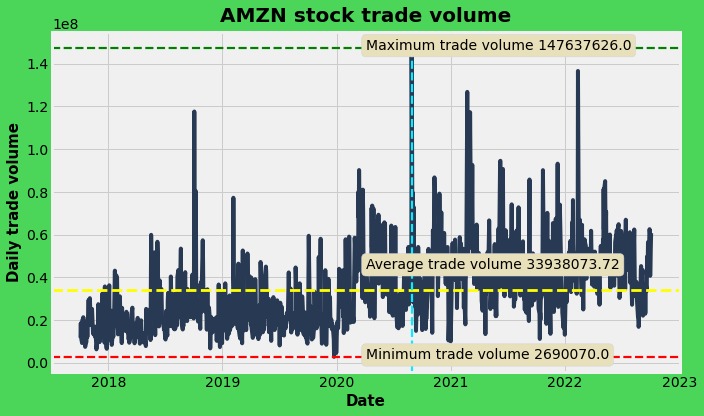

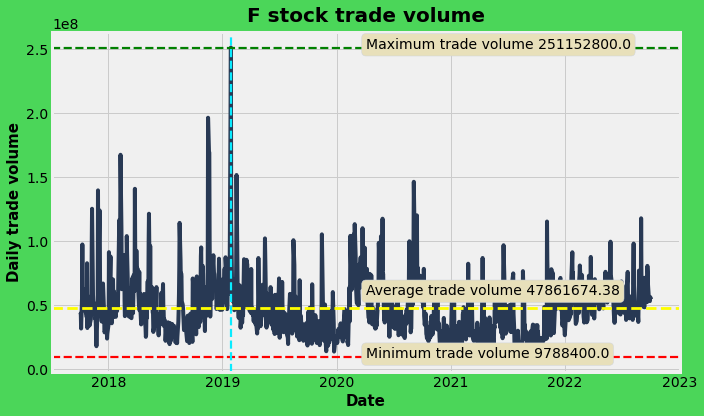

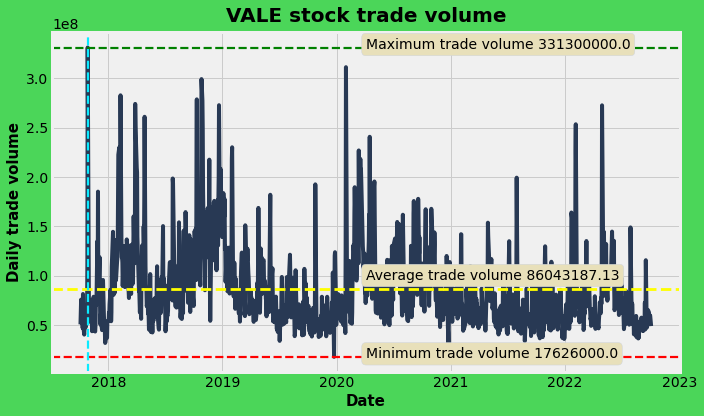

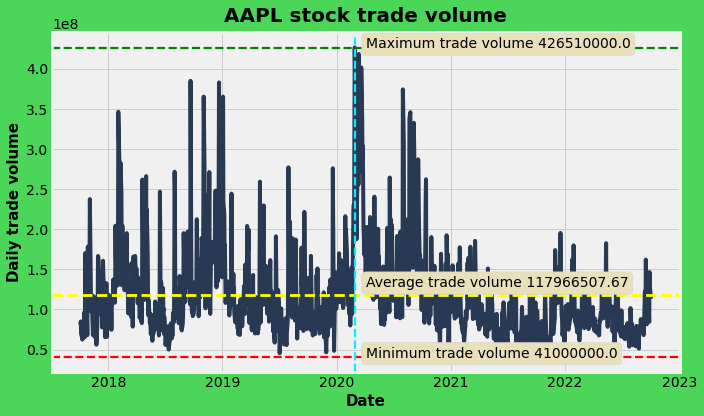

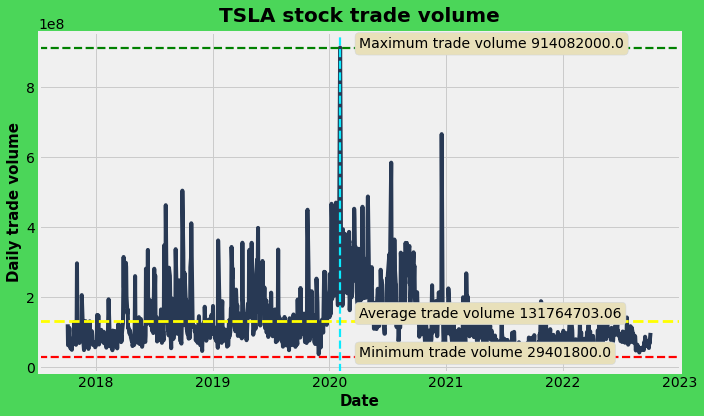

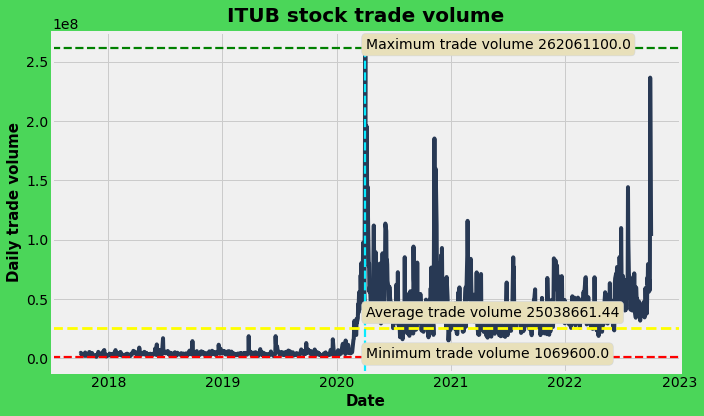

In [22]:
# function to visualize trade volume of stocks
def trade_vol(df_10_stocks):
    
    # x and y coords for average trade volume
    ave_x = df_10_stocks['Date'].mean()
    ave_y = df_10_stocks['Volume'].mean()
    # y coord for max trade vol
    max_y = df_10_stocks['Volume'].max()
    # y coord for min trade vol
    min_y = df_10_stocks['Volume'].min()
    
    fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df_10_stocks['Date'], df_10_stocks['Volume'], color='#283954')
    ax.set_title(f"{df_10_stocks['Name'].unique()[0]} stock trade volume", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily trade volume", fontsize=15)
    ax.axhline(y=df_10_stocks['Volume'].max(), linestyle='--', lw=2.2, color='green')
    ax.axhline(y=df_10_stocks['Volume'].min(), linestyle='--',lw=2.2, color='red')
    ax.axhline(y=df_10_stocks['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
    ax.axvline(x=df_10_stocks[df_10_stocks['Volume'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
    ax.annotate(f"Average trade volume {round(df_10_stocks['Volume'].mean(),2)}", 
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Maximum trade volume {df_10_stocks['Volume'].max()}", 
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Minimum trade volume {df_10_stocks['Volume'].min()}", 
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    
    plt.show()
    

# plot of all stocks trade volume
trade_vol(CCL_df)
trade_vol(NVDA_df)
trade_vol(AMD_df)
trade_vol(ET_df)
trade_vol(AMZN_df)
trade_vol(F_df)
trade_vol(VALE_df)
trade_vol(AAPL_df)
trade_vol(TSLA_df)
trade_vol(ITUB_df)

Observations:

Above visualizations depicts what was the maximum, minimum and average trade volume overa period of 2017-2022.
As visualizations are self-explanatory in nature we can also learn variance of trade volume for example stock ticker 'INTC' has a higest variance in trade volume compared other tickers.

Comparative analysis of all stocks

What is comparative analysis of stocks in finance and investment industry?
An important aspect of the fundamental analysis of stocks is comparing stocks of the same sector. The most basic way to analyse and compare stocks from the same sector is to conduct an analysis of different ratios like Earnings per share (EPS), Price-to-Earnings (P/E Ratio), Return on Equity (ROE), Return on Capital Employed (ROCE), and Debt-to-Equity ratios, and stock-prices of various companies, trade volume of stocks.
In this project, due to limited data of companies, we can only compare daily mean stock price of companies and can make inferences like stock price comparison and relative stock price fluctuations that I have mentioned below chart.


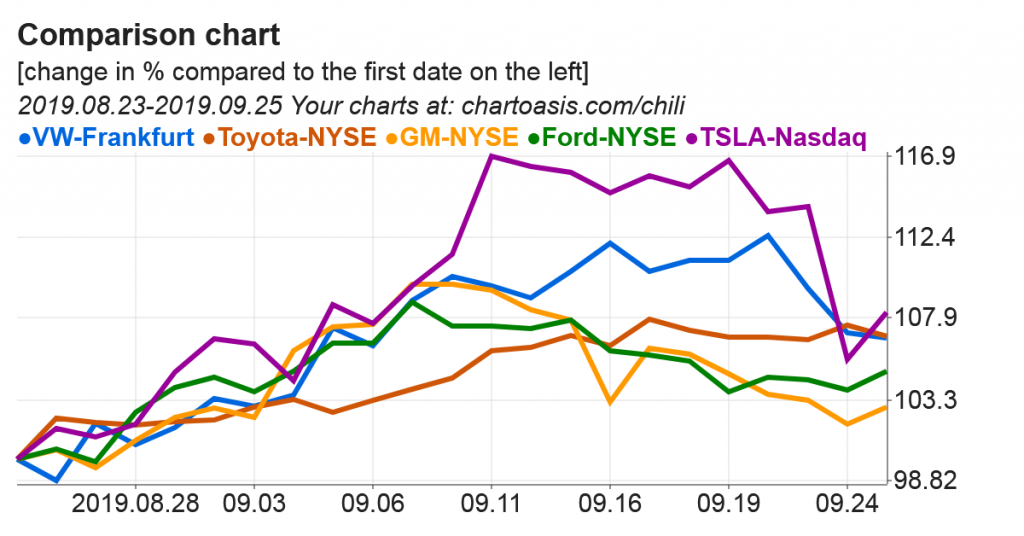

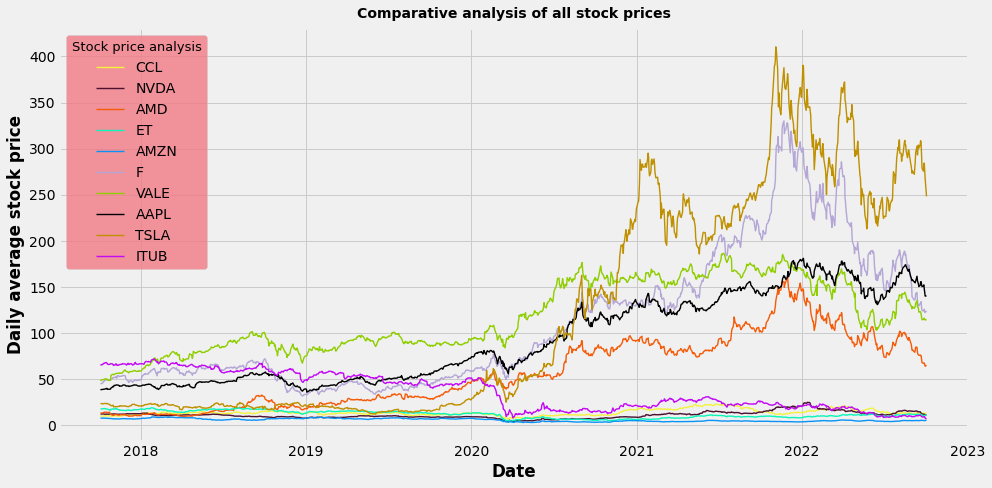

In [61]:

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(CCL_df['Date'], CCL_df['daily_mean'],label='CCL', color='#f2f23f', lw=1.4)
ax.plot(NVDA_df['Date'], NVDA_df['daily_mean'],label='NVDA', color='#4c1130', lw=1.4)
ax.plot(AMD_df['Date'], AMD_df['daily_mean'],label='AMD', color='#f55c0a', lw=1.4)
ax.plot(ET_df['Date'], ET_df['daily_mean'],label='ET', color='#0af5ba', lw=1.4)
ax.plot(AMZN_df['Date'], AMZN_df['daily_mean'],label='AMZN', color='#0a93f5', lw=1.4)
ax.plot(F_df['Date'], F_df['daily_mean'],label='F', color='#b4a7d6', lw=1.4)
ax.plot(VALE_df['Date'], VALE_df['daily_mean'],label='VALE', color='#8fce00', lw=1.4)
ax.plot(AAPL_df['Date'], AAPL_df['daily_mean'],label='AAPL', color='#000000', lw=1.4)
ax.plot(TSLA_df['Date'], TSLA_df['daily_mean'],label='TSLA', color='#bf9000', lw=1.4)
ax.plot(ITUB_df['Date'], ITUB_df['daily_mean'],label='ITUB', color='#c20af5', lw=1.4)
ax.set_title("Comparative analysis of all stock prices")
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(facecolor='#f27985', fontsize="medium", title="Stock price analysis", title_fontsize=13)

plt.show()

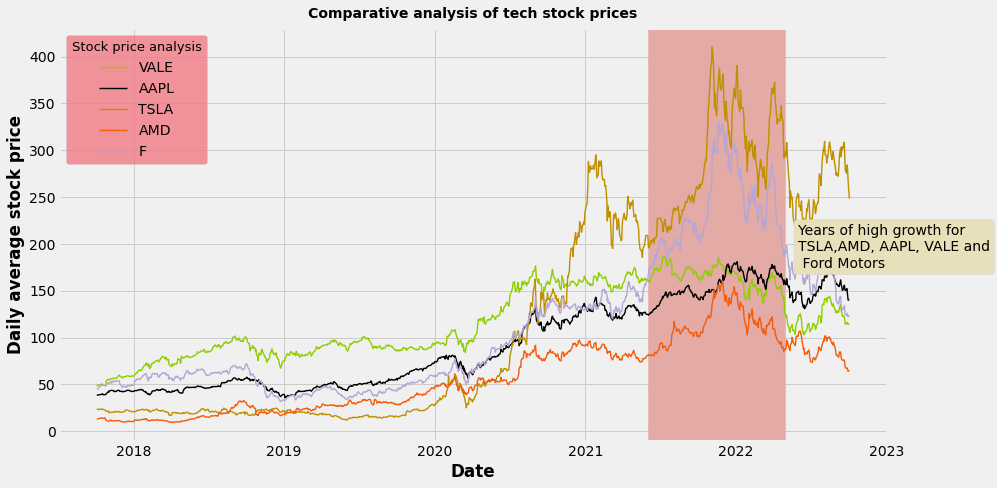

In [62]:
# Companies that overcame the pandemic crash
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(VALE_df['Date'], VALE_df['daily_mean'],label='VALE', color='#8fce00', lw=1.4)
ax.plot(AAPL_df['Date'], AAPL_df['daily_mean'],label='AAPL', color='#000000', lw=1.4)
ax.plot(TSLA_df['Date'], TSLA_df['daily_mean'],label='TSLA', color='#bf9000', lw=1.4)
ax.plot(AMD_df['Date'], AMD_df['daily_mean'],label='AMD', color='#f55c0a', lw=1.4)
ax.plot(F_df['Date'], F_df['daily_mean'],label='F', color='#b4a7d6', lw=1.4)

ax.set_title("Companies that overcame the pandemic crash")
ax.axvspan(*mdates.datestr2num(['6/1/2021','5/1/2022']), color='#e3aaa6')
ax.set_title("Comparative analysis of tech stock prices")
ax.annotate("Years of high growth for\nTSLA,AMD, AAPL, VALE and\n Ford Motors", xy=(mdates.datestr2num('6/1/2022'),175),
           bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(facecolor='#f27985', fontsize="medium", title="Stock price analysis", title_fontsize=13)

plt.show()

Observations

It is very clear that 'TSLA' stock was one of the most expensive among all stocks.
stock ticker 'ET' was among the cheapest to buy compared to other stocks



# **Find out growth of stocks of the companies over a 5 years period**

Growth of stock prices
In finance and investment industry, stock price growth is really important metric one needs to measure to find out the how is stock or investment of an individual is growing
Below is the formula to find out growth of stock prices
source: educba.com

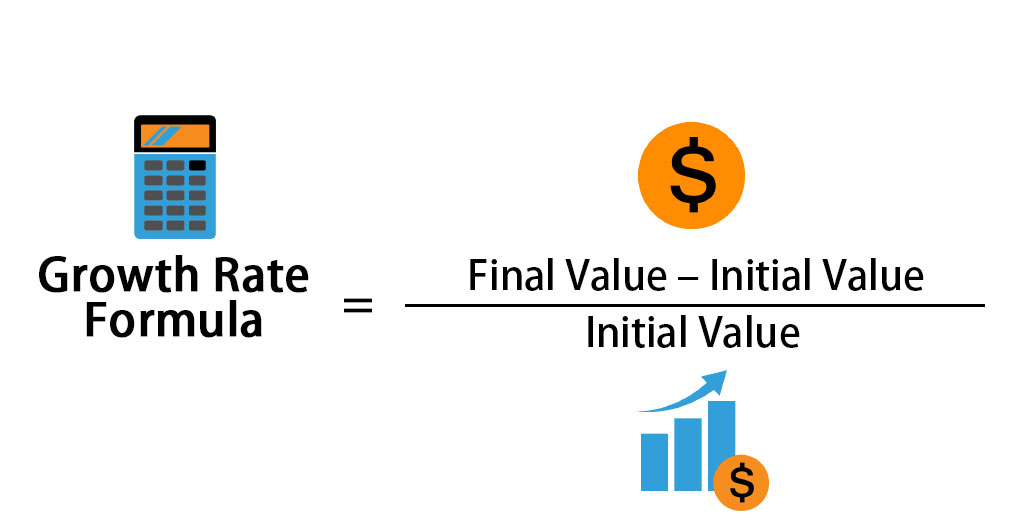

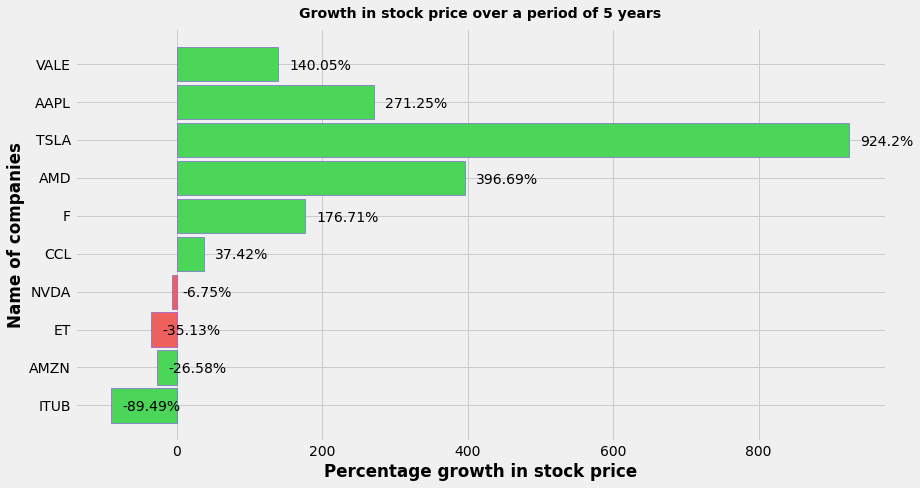

In [25]:
# list of stock dataframes
list_df = [ITUB_df, AMZN_df, ET_df, NVDA_df, CCL_df, F_df, AMD_df, TSLA_df, AAPL_df, VALE_df]

# loop through the the list_df to find mini and maxi of each stocks 
mini = [df[df['Date'] == df['Date'].min()]['Close'].values.item() for df in list_df]
maxi = [df[df['Date'] == df['Date'].max()]['Close'].values.item() for df in list_df]

# find list of abosolute difference between both stock price
diff = np.array(maxi) - np.array(mini)

# find the percentage growth
growth = (diff/mini)*100
growth_list = growth.tolist()
co_name_list = [df['Name'].unique()[0] for df in list_df]

# visualize the growth of the stocks
fig, ax = plt.subplots(figsize=(13,7))
ax.barh(y=co_name_list, width=growth_list, height=0.9, color=['#4bd659','#4bd659','#ed615c','#ed615c','#4bd659',
                                                             '#4bd659','#4bd659','#4bd659','#4bd659','#4bd659'],
       edgecolor='#713ae8')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),2)}%', (p.get_width()+15, p.get_y() +0.3))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 5 years")
plt.show()

Observations

We can observe that growth of stock 'Tesla' is the highest among all other 10 stocks over a period of 5 years
It is very much self-explanotary that stocks of 'ITUB' and 'ET' has given negative return over a years of period.

# **Stock price forecasting: Modelling and forecast**

**Forecasting Using Prophet**

Prophet is a method for predicting time series data that uses an additive model to suit non-linear trends with seasonality that occurs annually, monthly, daily, and on weekends as well as during holidays. Strongly seasonal time series and multiple seasons of historical data are ideal for it. Prophet typically manages outliers well and is robust to missing data and changes in the trend.

source: https://facebook.github.io/prophet/

I will use FB prophet to forecast the stock of two automotive companies, Tesla and Ford Motors

In [63]:
# create function to return dataframe for forecating
def df_formatting(df):
    df = df.loc[:, ['Date','Close']]
    df.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
    
    return df

Tesla_df = df_formatting(TSLA_df)
ford_df = df_formatting(F_df)

In [27]:
# forecasting using prophet
def price_forecasting(df, period):
    
    prophet = Prophet(yearly_seasonality = 'auto')
    prophet.fit(df)
    future_price = prophet.make_future_dataframe(periods=period)
    forecasts = prophet.predict(future_price)
    forecast = forecasts[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    # plot the foreasts
    fig = prophet.plot(forecasts)
    a = add_changepoints_to_plot(fig.gca(), prophet, forecasts)
    
    # plot the components 
    fig2 = prophet.plot_components(forecasts)
    
    return forecasts

# **'TSLA' stock price forecasting**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


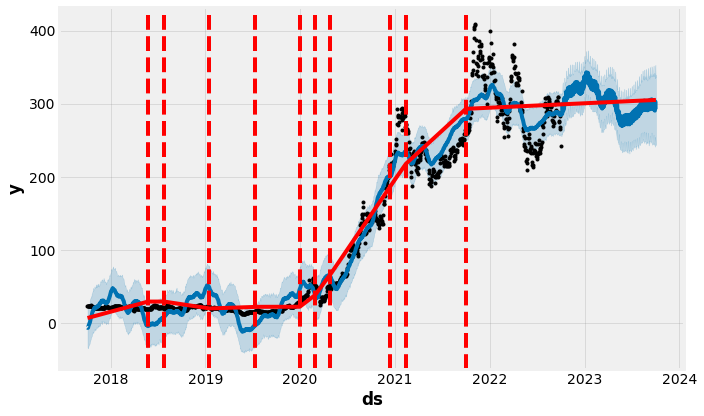

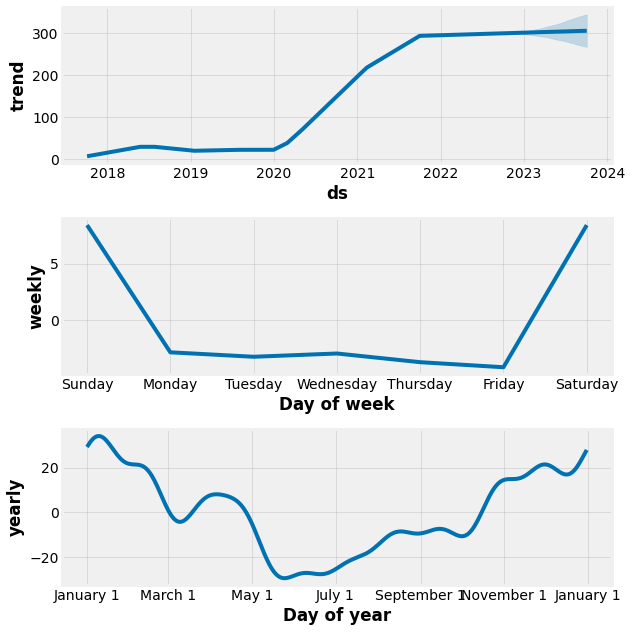

In [65]:
forecast_aapl = price_forecasting(Tesla_df, 365)

'Ford Motors' stock price forecasting

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


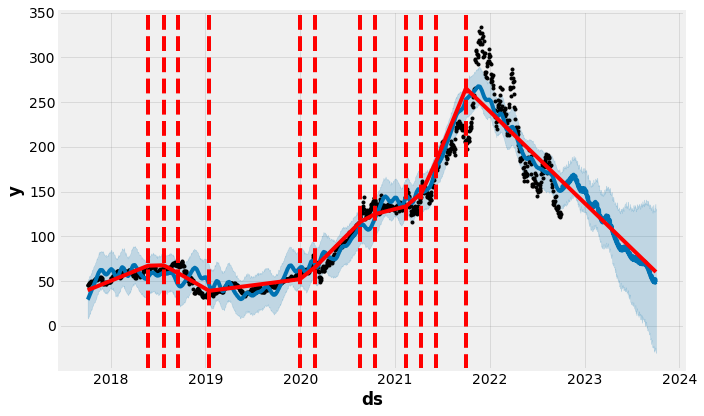

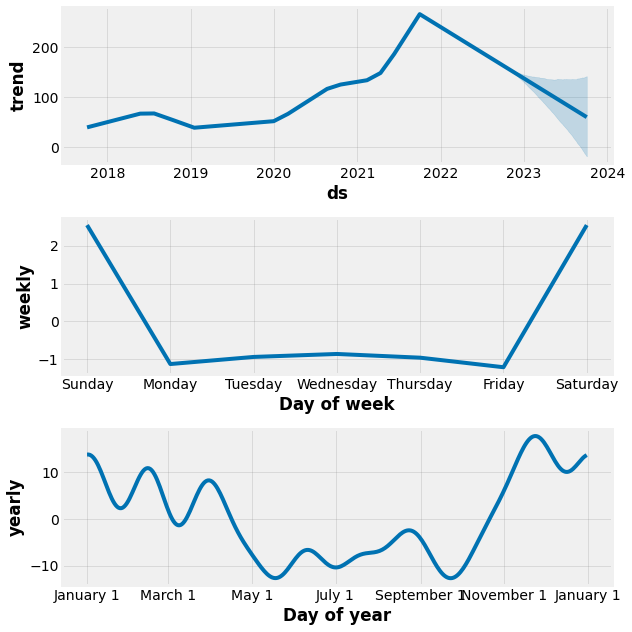

In [64]:
forecast_fb = price_forecasting(ford_df, 365)

# Observations
Tesla stock will be within the $300 mark till 2024 as supported by the trend.  Stock price increeases on Fridays. From Monthly analysis, May is the best time to buy.

Ford motors stock is in decline and will continue till 2024. For a daily trader, the best time to buy is on sunday and sell on friday

# **USING LSTM**

I will use LSTM to forecast the 'ET' stock

In [48]:
def df_to_X_y(df, window_size=5):
  df_as_np = ET_df['Close'].to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [49]:
close = df_10_stocks['Close']
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(close, WINDOW_SIZE)
X1.shape, y1.shape

((1253, 5, 1), (1253,))

In [50]:
X_train1, y_train1 = X1[:950], y1[:950]
X_val1, y_val1 = X1[950:1150], y1[950:1150]
X_test1, y_test1 = X1[1150:], y1[1150:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((950, 5, 1), (950,), (200, 5, 1), (200,), (103, 5, 1), (103,))

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [52]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [53]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
21/30 [====================>.........] - ETA: 0s - loss: 166.0139 - root_mean_squared_error: 12.8846

30/30 [==============================] - 7s 169ms/step - loss: 167.4439 - root_mean_squared_error: 12.9400 - val_loss: 90.8430 - val_root_mean_squared_error: 9.5312
Epoch 2/100
27/30 [==========================>...] - ETA: 0s - loss: 164.2962 - root_mean_squared_error: 12.8178

30/30 [==============================] - 5s 173ms/step - loss: 163.7653 - root_mean_squared_error: 12.7971 - val_loss: 87.9304 - val_root_mean_squared_error: 9.3771
Epoch 3/100
25/30 [========================>.....] - ETA: 0s - loss: 161.2332 - root_mean_squared_error: 12.6978

30/30 [==============================] - 5s 155ms/step - loss: 160.2110 - root_mean_squared_error: 12.6574 - val_loss: 84.7278 - val_root_mean_squared_error: 9.2048
Epoch 4/100
25/30 [========================>.....] - ETA: 0s - loss: 154.7364 - root_mean_squared_error: 12.4393

30/30 [==============================] - 5s 171ms/step - loss: 156.3001 - root_mean_squared_error: 12.5020 - val_loss: 81.3157 - val_root_mean_squared_error: 9.0175
Epoch 5/100
20/30 [===================>..........] - ETA: 0s - loss: 152.7459 - root_mean_squared_error: 12.3590

30/30 [==============================] - 5s 158ms/step - loss: 151.9886 - root_mean_squared_error: 12.3284 - val_loss: 77.7147 - val_root_mean_squared_error: 8.8156
Epoch 6/100
26/30 [=========================>....] - ETA: 0s - loss: 147.9751 - root_mean_squared_error: 12.1645

30/30 [==============================] - 5s 171ms/step - loss: 147.3052 - root_mean_squared_error: 12.1369 - val_loss: 73.6147 - val_root_mean_squared_error: 8.5799
Epoch 7/100
27/30 [==========================>...] - ETA: 0s - loss: 142.0186 - root_mean_squared_error: 11.9172

30/30 [==============================] - 5s 157ms/step - loss: 142.0114 - root_mean_squared_error: 11.9169 - val_loss: 69.2702 - val_root_mean_squared_error: 8.3229
Epoch 8/100
26/30 [=========================>....] - ETA: 0s - loss: 137.1031 - root_mean_squared_error: 11.7091

30/30 [==============================] - 6s 203ms/step - loss: 136.1629 - root_mean_squared_error: 11.6689 - val_loss: 64.8464 - val_root_mean_squared_error: 8.0527
Epoch 9/100
25/30 [========================>.....] - ETA: 0s - loss: 132.3926 - root_mean_squared_error: 11.5062

30/30 [==============================] - 5s 156ms/step - loss: 130.1225 - root_mean_squared_error: 11.4071 - val_loss: 60.4383 - val_root_mean_squared_error: 7.7742
Epoch 10/100
26/30 [=========================>....] - ETA: 0s - loss: 125.0334 - root_mean_squared_error: 11.1818

30/30 [==============================] - 5s 155ms/step - loss: 124.0596 - root_mean_squared_error: 11.1382 - val_loss: 56.1704 - val_root_mean_squared_error: 7.4947
Epoch 11/100
26/30 [=========================>....] - ETA: 0s - loss: 117.3936 - root_mean_squared_error: 10.8348

30/30 [==============================] - 5s 176ms/step - loss: 118.0592 - root_mean_squared_error: 10.8655 - val_loss: 52.1370 - val_root_mean_squared_error: 7.2206
Epoch 12/100
27/30 [==========================>...] - ETA: 0s - loss: 113.2420 - root_mean_squared_error: 10.6415

30/30 [==============================] - 4s 155ms/step - loss: 112.3564 - root_mean_squared_error: 10.5998 - val_loss: 48.2988 - val_root_mean_squared_error: 6.9497
Epoch 13/100
23/30 [======================>.......] - ETA: 0s - loss: 107.1272 - root_mean_squared_error: 10.3502

30/30 [==============================] - 5s 168ms/step - loss: 106.7743 - root_mean_squared_error: 10.3332 - val_loss: 42.8626 - val_root_mean_squared_error: 6.5470
Epoch 14/100
26/30 [=========================>....] - ETA: 0s - loss: 97.0517 - root_mean_squared_error: 9.8515  

30/30 [==============================] - 5s 157ms/step - loss: 96.1675 - root_mean_squared_error: 9.8065 - val_loss: 33.5121 - val_root_mean_squared_error: 5.7890
Epoch 15/100
26/30 [=========================>....] - ETA: 0s - loss: 86.1545 - root_mean_squared_error: 9.2819

30/30 [==============================] - 5s 173ms/step - loss: 83.8925 - root_mean_squared_error: 9.1593 - val_loss: 26.5382 - val_root_mean_squared_error: 5.1515
Epoch 16/100
25/30 [========================>.....] - ETA: 0s - loss: 74.2545 - root_mean_squared_error: 8.6171

30/30 [==============================] - 5s 179ms/step - loss: 74.1604 - root_mean_squared_error: 8.6116 - val_loss: 21.1014 - val_root_mean_squared_error: 4.5936
Epoch 17/100
27/30 [==========================>...] - ETA: 0s - loss: 65.4469 - root_mean_squared_error: 8.0899

30/30 [==============================] - 5s 173ms/step - loss: 66.0482 - root_mean_squared_error: 8.1270 - val_loss: 16.6160 - val_root_mean_squared_error: 4.0763
Epoch 18/100
24/30 [=======================>......] - ETA: 0s - loss: 60.1626 - root_mean_squared_error: 7.7565

30/30 [==============================] - 5s 158ms/step - loss: 59.0343 - root_mean_squared_error: 7.6834 - val_loss: 12.9374 - val_root_mean_squared_error: 3.5969
Epoch 19/100
27/30 [==========================>...] - ETA: 0s - loss: 52.0118 - root_mean_squared_error: 7.2119

30/30 [==============================] - 5s 172ms/step - loss: 52.9049 - root_mean_squared_error: 7.2736 - val_loss: 10.0227 - val_root_mean_squared_error: 3.1659
Epoch 20/100
25/30 [========================>.....] - ETA: 0s - loss: 49.0560 - root_mean_squared_error: 7.0040

30/30 [==============================] - 5s 159ms/step - loss: 47.7962 - root_mean_squared_error: 6.9135 - val_loss: 7.6857 - val_root_mean_squared_error: 2.7723
Epoch 21/100
27/30 [==========================>...] - ETA: 0s - loss: 43.4959 - root_mean_squared_error: 6.5951

30/30 [==============================] - 5s 172ms/step - loss: 43.4966 - root_mean_squared_error: 6.5952 - val_loss: 5.9069 - val_root_mean_squared_error: 2.4304
Epoch 22/100
27/30 [==========================>...] - ETA: 0s - loss: 39.9113 - root_mean_squared_error: 6.3175

30/30 [==============================] - 4s 154ms/step - loss: 39.9184 - root_mean_squared_error: 6.3181 - val_loss: 4.5144 - val_root_mean_squared_error: 2.1247
Epoch 23/100
25/30 [========================>.....] - ETA: 0s - loss: 37.9578 - root_mean_squared_error: 6.1610

30/30 [==============================] - 5s 155ms/step - loss: 36.8934 - root_mean_squared_error: 6.0740 - val_loss: 3.3963 - val_root_mean_squared_error: 1.8429
Epoch 24/100
26/30 [=========================>....] - ETA: 0s - loss: 35.1235 - root_mean_squared_error: 5.9265

30/30 [==============================] - 5s 175ms/step - loss: 34.2000 - root_mean_squared_error: 5.8481 - val_loss: 2.5560 - val_root_mean_squared_error: 1.5988
Epoch 25/100
27/30 [==========================>...] - ETA: 0s - loss: 32.2758 - root_mean_squared_error: 5.6812

30/30 [==============================] - 4s 155ms/step - loss: 31.8736 - root_mean_squared_error: 5.6457 - val_loss: 1.9119 - val_root_mean_squared_error: 1.3827
Epoch 26/100
26/30 [=========================>....] - ETA: 0s - loss: 30.1825 - root_mean_squared_error: 5.4939

30/30 [==============================] - 5s 178ms/step - loss: 29.7957 - root_mean_squared_error: 5.4585 - val_loss: 1.4433 - val_root_mean_squared_error: 1.2014
Epoch 27/100
29/30 [============================>.] - ETA: 0s - loss: 27.9903 - root_mean_squared_error: 5.2906

30/30 [==============================] - 5s 183ms/step - loss: 27.9608 - root_mean_squared_error: 5.2878 - val_loss: 1.1046 - val_root_mean_squared_error: 1.0510
Epoch 28/100
27/30 [==========================>...] - ETA: 0s - loss: 26.4271 - root_mean_squared_error: 5.1407

30/30 [==============================] - 5s 173ms/step - loss: 26.3262 - root_mean_squared_error: 5.1309 - val_loss: 0.8773 - val_root_mean_squared_error: 0.9366
Epoch 29/100
27/30 [==========================>...] - ETA: 0s - loss: 25.2095 - root_mean_squared_error: 5.0209

30/30 [==============================] - 5s 156ms/step - loss: 24.8024 - root_mean_squared_error: 4.9802 - val_loss: 0.7460 - val_root_mean_squared_error: 0.8637
Epoch 30/100
25/30 [========================>.....] - ETA: 0s - loss: 23.1150 - root_mean_squared_error: 4.8078

30/30 [==============================] - 5s 176ms/step - loss: 23.3038 - root_mean_squared_error: 4.8274 - val_loss: 0.6785 - val_root_mean_squared_error: 0.8237
Epoch 31/100
24/30 [=======================>......] - ETA: 0s - loss: 21.5223 - root_mean_squared_error: 4.6392

30/30 [==============================] - 5s 158ms/step - loss: 21.8080 - root_mean_squared_error: 4.6699 - val_loss: 0.5813 - val_root_mean_squared_error: 0.7625
Epoch 32/100
24/30 [=======================>......] - ETA: 0s - loss: 20.2764 - root_mean_squared_error: 4.5029

30/30 [==============================] - 5s 175ms/step - loss: 20.1733 - root_mean_squared_error: 4.4915 - val_loss: 0.5228 - val_root_mean_squared_error: 0.7231
Epoch 33/100
25/30 [========================>.....] - ETA: 0s - loss: 18.8542 - root_mean_squared_error: 4.3421

30/30 [==============================] - 5s 183ms/step - loss: 18.9222 - root_mean_squared_error: 4.3500 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 34/100
25/30 [========================>.....] - ETA: 0s - loss: 17.5513 - root_mean_squared_error: 4.1894

30/30 [==============================] - 5s 174ms/step - loss: 17.7701 - root_mean_squared_error: 4.2155 - val_loss: 0.4678 - val_root_mean_squared_error: 0.6840
Epoch 35/100
27/30 [==========================>...] - ETA: 0s - loss: 16.8020 - root_mean_squared_error: 4.0990

30/30 [==============================] - 5s 157ms/step - loss: 16.5989 - root_mean_squared_error: 4.0742 - val_loss: 0.4444 - val_root_mean_squared_error: 0.6666
Epoch 36/100
27/30 [==========================>...] - ETA: 0s - loss: 15.2721 - root_mean_squared_error: 3.9080

30/30 [==============================] - 5s 170ms/step - loss: 15.1141 - root_mean_squared_error: 3.8877 - val_loss: 0.3002 - val_root_mean_squared_error: 0.5479
Epoch 37/100
24/30 [=======================>......] - ETA: 0s - loss: 14.0837 - root_mean_squared_error: 3.7528

30/30 [==============================] - 5s 156ms/step - loss: 13.7521 - root_mean_squared_error: 3.7084 - val_loss: 0.2398 - val_root_mean_squared_error: 0.4897
Epoch 38/100
26/30 [=========================>....] - ETA: 0s - loss: 12.5042 - root_mean_squared_error: 3.5361

30/30 [==============================] - 5s 155ms/step - loss: 12.5758 - root_mean_squared_error: 3.5462 - val_loss: 0.2138 - val_root_mean_squared_error: 0.4624
Epoch 39/100
26/30 [=========================>....] - ETA: 0s - loss: 11.1951 - root_mean_squared_error: 3.3459

30/30 [==============================] - 5s 175ms/step - loss: 11.4142 - root_mean_squared_error: 3.3785 - val_loss: 0.1487 - val_root_mean_squared_error: 0.3857
Epoch 40/100
23/30 [======================>.......] - ETA: 0s - loss: 10.1785 - root_mean_squared_error: 3.1904

30/30 [==============================] - 5s 155ms/step - loss: 10.1199 - root_mean_squared_error: 3.1812 - val_loss: 0.0937 - val_root_mean_squared_error: 0.3061
Epoch 41/100
26/30 [=========================>....] - ETA: 0s - loss: 9.2541 - root_mean_squared_error: 3.0421

30/30 [==============================] - 5s 174ms/step - loss: 9.1580 - root_mean_squared_error: 3.0262 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2925
Epoch 42/100
30/30 [==============================] - 0s 5ms/step - loss: 8.2448 - root_mean_squared_error: 2.8714 - val_loss: 0.1551 - val_root_mean_squared_error: 0.3939
Epoch 43/100
30/30 [==============================] - 0s 6ms/step - loss: 7.4740 - root_mean_squared_error: 2.7339 - val_loss: 0.1845 - val_root_mean_squared_error: 0.4295
Epoch 44/100
30/30 [==============================] - 0s 5ms/step - loss: 6.8197 - root_mean_squared_error: 2.6115 - val_loss: 0.3108 - val_root_mean_squared_error: 0.5575
Epoch 45/100
30/30 [==============================] - 0s 5ms/step - loss: 6.2354 - root_mean_squared_error: 2.4971 - val_loss: 0.2845 - val_root_mean_squared_error: 0.5334
Epoch 46/100
30/30 [==============================] - 0s 6ms/step - loss: 5.7035 - root_mean_squared_error: 2.3882 - val_loss: 0.2102 - val_root_mean_s

30/30 [==============================] - 5s 160ms/step - loss: 2.5221 - root_mean_squared_error: 1.5881 - val_loss: 0.0795 - val_root_mean_squared_error: 0.2820
Epoch 57/100
25/30 [========================>.....] - ETA: 0s - loss: 2.3325 - root_mean_squared_error: 1.5272

30/30 [==============================] - 5s 175ms/step - loss: 2.3383 - root_mean_squared_error: 1.5292 - val_loss: 0.0787 - val_root_mean_squared_error: 0.2805
Epoch 58/100
30/30 [==============================] - 0s 5ms/step - loss: 2.1698 - root_mean_squared_error: 1.4730 - val_loss: 0.1016 - val_root_mean_squared_error: 0.3187
Epoch 59/100
30/30 [==============================] - 0s 6ms/step - loss: 2.0194 - root_mean_squared_error: 1.4211 - val_loss: 0.0811 - val_root_mean_squared_error: 0.2848
Epoch 60/100
26/30 [=========================>....] - ETA: 0s - loss: 1.8963 - root_mean_squared_error: 1.3771

30/30 [==============================] - 5s 156ms/step - loss: 1.8760 - root_mean_squared_error: 1.3697 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2747
Epoch 61/100
25/30 [========================>.....] - ETA: 0s - loss: 1.7373 - root_mean_squared_error: 1.3180

30/30 [==============================] - 5s 172ms/step - loss: 1.7474 - root_mean_squared_error: 1.3219 - val_loss: 0.0733 - val_root_mean_squared_error: 0.2708
Epoch 62/100
30/30 [==============================] - 0s 6ms/step - loss: 1.6313 - root_mean_squared_error: 1.2772 - val_loss: 0.0787 - val_root_mean_squared_error: 0.2806
Epoch 63/100
30/30 [==============================] - 0s 5ms/step - loss: 1.5212 - root_mean_squared_error: 1.2334 - val_loss: 0.0845 - val_root_mean_squared_error: 0.2907
Epoch 64/100
26/30 [=========================>....] - ETA: 0s - loss: 1.4452 - root_mean_squared_error: 1.2021

30/30 [==============================] - 4s 154ms/step - loss: 1.4233 - root_mean_squared_error: 1.1930 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2690
Epoch 65/100
30/30 [==============================] - 0s 5ms/step - loss: 1.3300 - root_mean_squared_error: 1.1533 - val_loss: 0.0861 - val_root_mean_squared_error: 0.2935
Epoch 66/100
24/30 [=======================>......] - ETA: 0s - loss: 1.2340 - root_mean_squared_error: 1.1109

30/30 [==============================] - 5s 174ms/step - loss: 1.2442 - root_mean_squared_error: 1.1154 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2655
Epoch 67/100
30/30 [==============================] - 0s 5ms/step - loss: 1.1661 - root_mean_squared_error: 1.0799 - val_loss: 0.0707 - val_root_mean_squared_error: 0.2659
Epoch 68/100
30/30 [==============================] - 0s 7ms/step - loss: 1.0906 - root_mean_squared_error: 1.0443 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2797
Epoch 69/100
30/30 [==============================] - 0s 6ms/step - loss: 1.0248 - root_mean_squared_error: 1.0123 - val_loss: 0.0948 - val_root_mean_squared_error: 0.3080
Epoch 70/100
25/30 [========================>.....] - ETA: 0s - loss: 0.9570 - root_mean_squared_error: 0.9783

30/30 [==============================] - 5s 159ms/step - loss: 0.9619 - root_mean_squared_error: 0.9808 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2639
Epoch 71/100
25/30 [========================>.....] - ETA: 0s - loss: 0.9073 - root_mean_squared_error: 0.9525

30/30 [==============================] - 5s 171ms/step - loss: 0.9043 - root_mean_squared_error: 0.9509 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2570
Epoch 72/100
30/30 [==============================] - 0s 6ms/step - loss: 0.8482 - root_mean_squared_error: 0.9210 - val_loss: 0.0882 - val_root_mean_squared_error: 0.2970
Epoch 73/100
30/30 [==============================] - 0s 6ms/step - loss: 0.8010 - root_mean_squared_error: 0.8950 - val_loss: 0.0942 - val_root_mean_squared_error: 0.3070
Epoch 74/100
30/30 [==============================] - 0s 6ms/step - loss: 0.7561 - root_mean_squared_error: 0.8696 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 75/100
30/30 [==============================] - 0s 6ms/step - loss: 0.7111 - root_mean_squared_error: 0.8433 - val_loss: 0.0668 - val_root_mean_squared_error: 0.2584
Epoch 76/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6744 - root_mean_squared_error: 0.8212 - val_loss: 0.0683 - val_root_mean_s

30/30 [==============================] - 5s 156ms/step - loss: 0.6025 - root_mean_squared_error: 0.7762 - val_loss: 0.0646 - val_root_mean_squared_error: 0.2541
Epoch 79/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5698 - root_mean_squared_error: 0.7549 - val_loss: 0.0659 - val_root_mean_squared_error: 0.2566
Epoch 80/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5407 - root_mean_squared_error: 0.7353 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 81/100
25/30 [========================>.....] - ETA: 0s - loss: 0.5194 - root_mean_squared_error: 0.7207

30/30 [==============================] - 5s 155ms/step - loss: 0.5145 - root_mean_squared_error: 0.7173 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2519
Epoch 82/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4878 - root_mean_squared_error: 0.6984 - val_loss: 0.0704 - val_root_mean_squared_error: 0.2653
Epoch 83/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4635 - root_mean_squared_error: 0.6808 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 84/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4414 - root_mean_squared_error: 0.6644 - val_loss: 0.0648 - val_root_mean_squared_error: 0.2546
Epoch 85/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4224 - root_mean_squared_error: 0.6499 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2673
Epoch 86/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4024 - root_mean_squared_error: 0.6343 - val_loss: 0.0730 - val_root_mean_s

30/30 [==============================] - 5s 177ms/step - loss: 0.3709 - root_mean_squared_error: 0.6090 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2517
Epoch 89/100
23/30 [======================>.......] - ETA: 0s - loss: 0.3565 - root_mean_squared_error: 0.5971

30/30 [==============================] - 5s 160ms/step - loss: 0.3525 - root_mean_squared_error: 0.5937 - val_loss: 0.0630 - val_root_mean_squared_error: 0.2510
Epoch 90/100
25/30 [========================>.....] - ETA: 0s - loss: 0.3471 - root_mean_squared_error: 0.5892

30/30 [==============================] - 5s 172ms/step - loss: 0.3373 - root_mean_squared_error: 0.5807 - val_loss: 0.0610 - val_root_mean_squared_error: 0.2470
Epoch 91/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3234 - root_mean_squared_error: 0.5687 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2570
Epoch 92/100
30/30 [==============================] - 0s 6ms/step - loss: 0.3122 - root_mean_squared_error: 0.5587 - val_loss: 0.0664 - val_root_mean_squared_error: 0.2577
Epoch 93/100
30/30 [==============================] - 0s 6ms/step - loss: 0.3000 - root_mean_squared_error: 0.5478 - val_loss: 0.0635 - val_root_mean_squared_error: 0.2519
Epoch 94/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2930 - root_mean_squared_error: 0.5413 - val_loss: 0.0630 - val_root_mean_squared_error: 0.2511
Epoch 95/100
24/30 [=======================>......] - ETA: 0s - loss: 0.2758 - root_mean_squared_error: 0.5252

30/30 [==============================] - 6s 195ms/step - loss: 0.2789 - root_mean_squared_error: 0.5281 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2462
Epoch 96/100
29/30 [============================>.] - ETA: 0s - loss: 0.2704 - root_mean_squared_error: 0.5200

30/30 [==============================] - 5s 169ms/step - loss: 0.2680 - root_mean_squared_error: 0.5177 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2462
Epoch 97/100
30/30 [==============================] - 0s 6ms/step - loss: 0.2605 - root_mean_squared_error: 0.5104 - val_loss: 0.0609 - val_root_mean_squared_error: 0.2468
Epoch 98/100
30/30 [==============================] - 0s 6ms/step - loss: 0.2529 - root_mean_squared_error: 0.5028 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2551
Epoch 99/100
25/30 [========================>.....] - ETA: 0s - loss: 0.2298 - root_mean_squared_error: 0.4793

30/30 [==============================] - 5s 160ms/step - loss: 0.2439 - root_mean_squared_error: 0.4939 - val_loss: 0.0586 - val_root_mean_squared_error: 0.2420
Epoch 100/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2379 - root_mean_squared_error: 0.4877 - val_loss: 0.0587 - val_root_mean_squared_error: 0.2423


In [54]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [55]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,16.949795,18.240000
1,16.967943,18.200001
2,16.976143,18.000000
3,16.967960,17.750000
4,16.946314,17.740000
...,...,...
945,10.269243,9.790000
946,10.050794,9.680000
947,9.864451,9.310000
948,9.617684,9.770000


In [57]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,9.731890,9.94
1,9.857889,10.00
2,9.974937,10.03
3,10.000128,9.75
4,9.917723,9.95
...,...,...
195,11.243674,11.08
196,11.183492,11.28
197,11.198627,11.74
198,11.358274,12.08


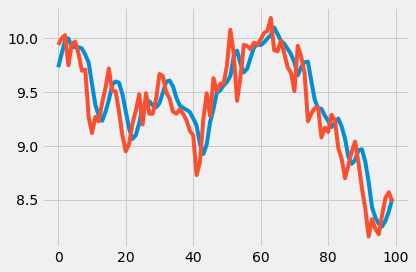

In [58]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [59]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,11.804093,11.63
1,11.778536,10.83
2,11.387531,10.69
3,11.023140,10.73
4,10.774035,10.66
...,...,...
98,10.700046,10.49
99,10.459229,11.11
100,10.612759,10.97
101,10.786279,11.03


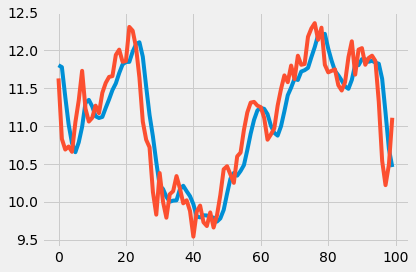

In [60]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])